## Lesson 345.1 Intro to Apache Spark & RDD
### Objectives
- **Define Spark Ecosystem and Framework** 
    - 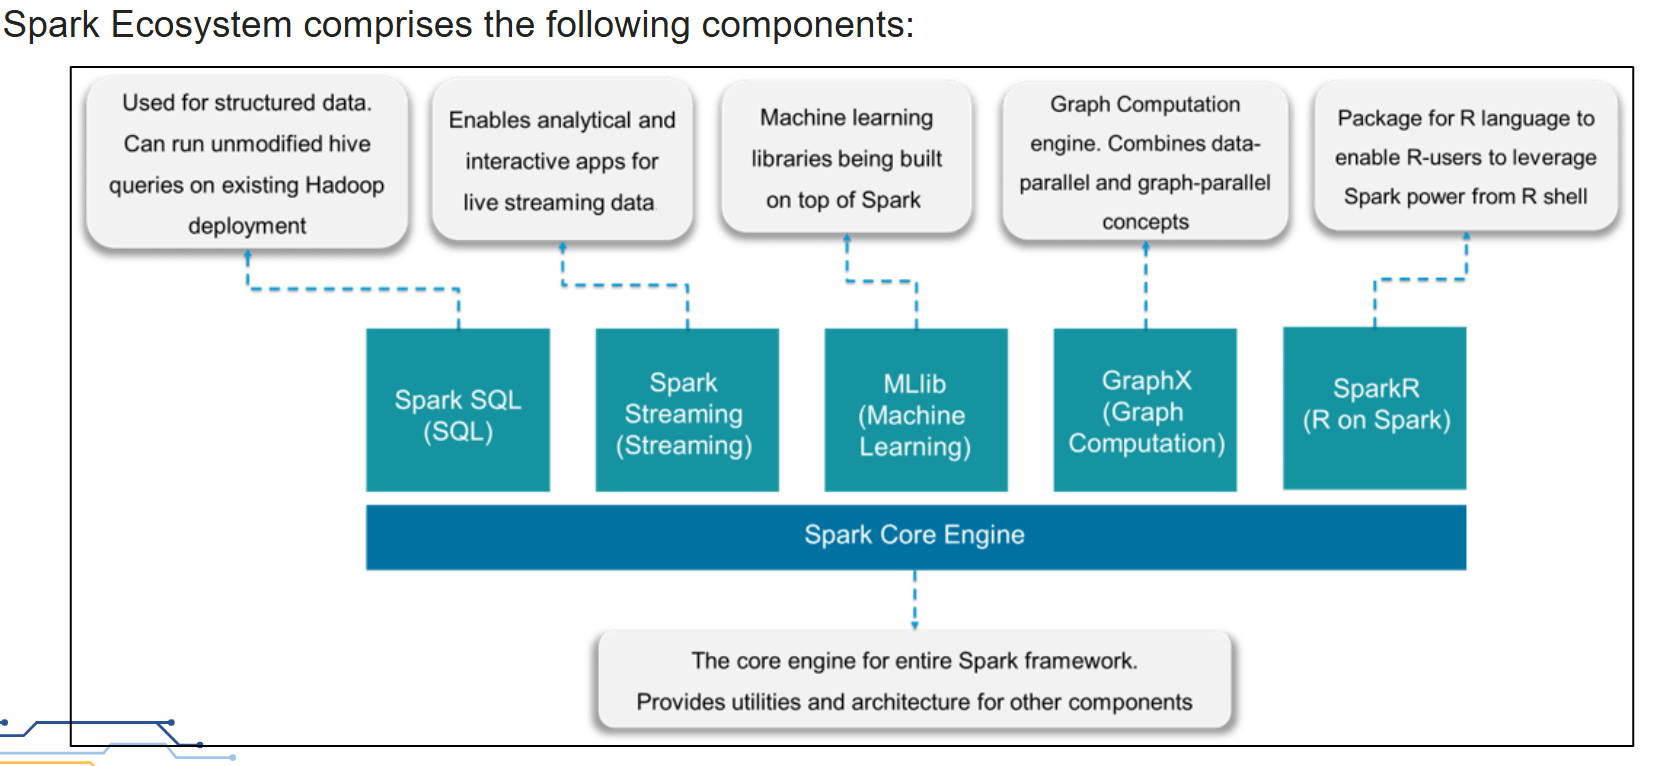
- **Describe the Spark Architecture**
    - Spark uses master/worker architecture, one master node, and many worker nodes. Here, the driver is the central coordinator. The Driver program runs in its own Java process. These drivers handle a large number of distributed workers. These distributed workers are actually executors. Each executor works as a separate Java process. The Spark application is a collaboration of the driver and its executors.

    - We can launch a Spark application on the set of machines by using a cluster manager. Spark has its own built-in cluster manager (e.g., standalone cluster manager). Although in Spark, we can work with some open-source cluster managers.
    - 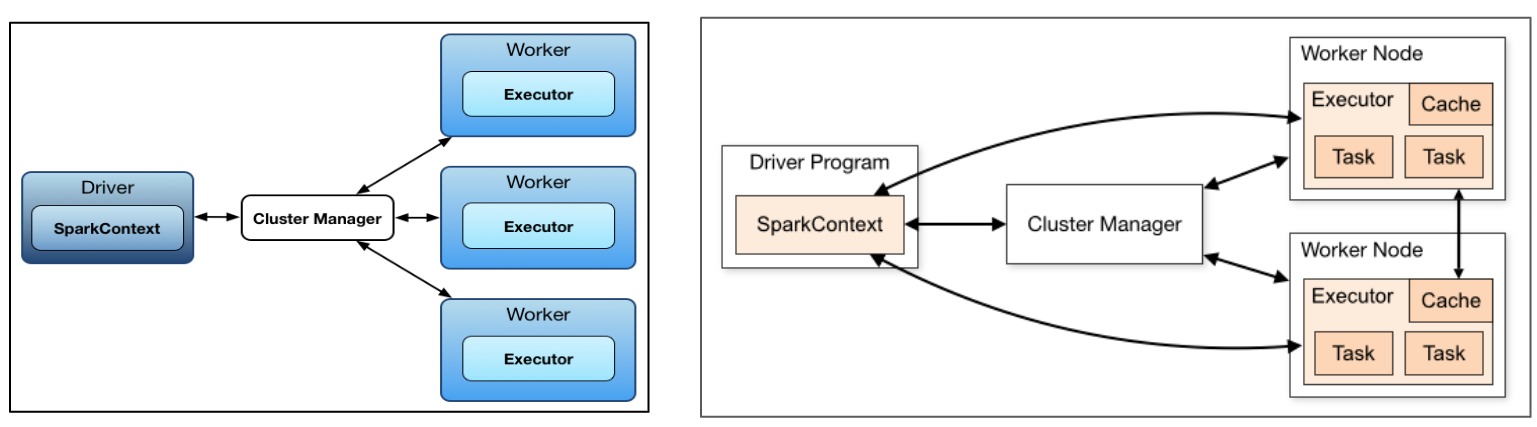

- **Setup Spark on local computer**
- **Describe Spark RDD**
- **Utilize Spark RDD**
- **Implement RDD Transformations and Actions to process large-scale data efficiently.**
- **Work with real datasets and apply Spark operations for data analysis.**

In [1]:
import os
import sys
import pandas as pd
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkContext, SparkConf
from pyspark.sql.functions import mean, avg, max, min, desc, count
import findspark
findspark.init()

In [ ]:
# Set environment variable
os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

### Initializing Spark Application
- **How to Create Spark Context:**
    - A SparkContext is created by using the SparkConf configuration object, which can be used to set various configuration options for the Spark application, such as the amount of memory allocated to the application, the number of cores used, and the master URL.

In [ ]:
conf = SparkConf().setAppName("app_name").setMaster("local")
conf.getAll()
# SparkContext.stop(conf)


In [ ]:
sc = SparkContext()
# SparkContext.stop(sc)
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
rdds = sc.parallelize(data)
display(rdds, rdds.collect())

In [ ]:
# Maker sure to stop the context within a final block
# SparkContext.stop(sc) or:
sc.stop()

In [ ]:
sc = SparkContext.getOrCreate()
airports = sc.textFile("Data/airports.txt")
airports.take(9)

In [ ]:
sc.stop()

### RDD Transformations - filter()
- Returns a new RDD with a subset of data in the original RDD. It takes in a function & returns an RDD formed by selecting those elements, which pass the function (i.e., returns True for the function)
- Used to remove some invalid rows to clean up the input RDD or just get a subset of the input RDD based on the filter function

In [ ]:
sc = SparkContext.getOrCreate()
airports = sc.textFile("Data/airports.txt")
us_airports = airports.filter(lambda line: line.split(",")[1] in ("\"Putnam County Airport\"", "\"Nadzab\""))
filtered = us_airports.collect()
print("Filter RDD -> %s" % (filtered))

In [ ]:
sc.stop()

### RDD Transformations - map()
- Applies a function to each element of RDD & returns the result as a new RDD
- Transforms an RDD of length N into another RDD of length N. The input & output size of the RDD will be the same

In [ ]:
sc = SparkContext.getOrCreate()
data = ["scala", "java", "hadoop", "spark", "akka", "spark vs hadoop", "pyspark", "Java"]
rdd = sc.parallelize(data)
rdd2 = rdd.map(lambda x: (x, 1))
print(rdd2.collect()[1:3])
print()
for element in rdd2.collect():
    print(element)


In [ ]:
sc.stop()

### Example: Transformations - map() & filter()
- The code below will split the airport names and country names and then filter only those airports that are in the United States. In this example, we are using airport.txt

In [ ]:
sc = SparkContext.getOrCreate()

airportsRDD = sc.textFile("Data/airports.txt")

# Split columns for Airport names and country
airportPairRDD = airportsRDD.map(lambda line: (line.split(",")[1], line.split(",")[3]))

# Printing list of all airport and country names
for element in airportPairRDD.collect():
    print(element)

# Filter list of all US airports
airportInUSA = airportPairRDD.filter(lambda keyValue: keyValue[1] == "\"United States\"")
print("------ list of USA Airports ------")
for elements in airportInUSA.collect():
    print(elements)

In [ ]:
sc.stop()

### Transformations - flatmap()
- An operation that applies to each element of an RDD and returns a new RDD. Similar to map() but allows for returning 0, 1, or more elements from the function. A developere can define a custom business logic and that same logic will be applied to all elements of the RDD. Transforms an RDD of length `N` into another RDD of length `M`: `N < M and N = M`

In [ ]:
sc = SparkContext.getOrCreate()

airportsRDD = sc.textFile("Data/airports.txt")

# Split columns for Airport names and country
airportPairRDD = airportsRDD.map(lambda line: (line.split(",")[1], line.split(",")[3]))

words = airportsRDD.flatMap(lambda x: x.split(" "))
for ele in words.collect():
    print(ele)

In [ ]:
sc.stop()

In [ ]:
sc = SparkContext.getOrCreate()

R = sc.parallelize([3, 4, 5])
output = R.map(lambda x: range(1, x)).collect()
print("Output:", output)

S = sc.parallelize([3, 4, 5])
output1 = S.flatMap(lambda x: range(1, x)).collect()
print("Output 1:", output1)

### Transformations - SET Operations
- Performed on one RDD:
    - sample
    - distinct
- Performed on two RDDs, and produce one resulting RDD:
    - union
    - intersection
    - subtract
    - cartesian

#### sample operation
- creates a random sample from an RDD and is useful for testing purposes.
- returns an RDD containing a sample of the previous RDD (takes a boolean and float).
    - boolean is whether or not a sample should be done with replacement (True indicates "with replacement")
    - float is the size of the sample to be taken:
        - 0.1 = 10%
        - 0.0592 = 5.92%
- Example: Using a `sample` transformation to create a new RDD consisting of 5 percent sample of the original RDD with replacement:

In [ ]:
airportsRDD = sc.textFile("Data/adult_data.csv")
print(airportsRDD.sample(True, 0.05).collect())

#### distinct operation
- returns an RDD containing only the distinct elements of the original RDD
- should be used after most filtering is done, as it requires a lot of resources

In [ ]:
dataRDD = sc.textFile("Data/word_count.txt")

words = dataRDD.flatMap(lambda x: x.split(" "))
print(words.distinct().collect())

#### union operator
- returns an RDD containing all data from two RDDs
- takes a second RDD as a parameter and can contain duplicates

In [ ]:
rdd1 = sc.parallelize([1, 2, 3])
rdd2 = sc.parallelize([4, 5, 6])
rdd3 = sc.parallelize([7, 8, 9])

rdd = sc.union([rdd1, rdd2, rdd3])
rdd.collect()

#### intersection operation
- returns an RDD containing only the data contained in both of the two RDDs
- like an INNER JOIN
- takes in a second RDD as a parameter
- removes all duplicates from given RDD

In [ ]:
sc.stop()

In [ ]:
sc = SparkContext.getOrCreate()
ds_one = sc.parallelize([("Mark", 1984), ("Lisa", 1985)])
ds_two = sc.parallelize([("Mark", 1984), ("Anastasia", 2017)])
sorted(ds_one.intersection(ds_two).collect())


# ds_one = sc.parallelize([("Mark", 1984), ("Lisa", 1985)])
# ds_two = sc.parallelize([("Mark", 1984), ("Anastasia", 2017)])

# print(ds_one.intersection(ds_two).collect())

reads data from two text files, processes them using RDD transformations, and finds the common elements (the first column) between them

In [ ]:
sc = SparkContext.getOrCreate()
cardataOne = sc.textFile( "Data/cardataOne.txt").map(lambda d: d.split("\t")[0])
cardataTwo = sc.textFile( "Data/cardataTwo.txt").map(lambda d: d.split("\t")[0])
print(cardataOne.intersection(cardataTwo).collect())


#### subtract operation
- returns an RDD containing data only present in the first of two RDDs

In [ ]:
cardataOne = sc.textFile( "Data/cardataOne.txt").map(lambda d: d.split("\t")[0])
cardataTwo = sc.textFile( "Data/cardataTwo.txt").map(lambda d: d.split("\t")[0])
print(cardataOne.subtract(cardataTwo).collect())

### Overview of RDD Actions
- Actions return final results of RDD computations. Actions trigger execution using lineage graphs to load the data into the original RDD, carry out all intermediate transformations, and return final results to the driver program or write them out to the file system.
- If we define an RDD, data does not get loaded immediately. In addition, none of the transformations actually get computed until you call an action like collect or count. Actions force all transformations to be evaluated.
- Some common actions are collect(), count(), take(), top(), countByValue(), reduce(), and foreach(), etc. 

In [ ]:
dataRDD = sc.textFile("Data/word_count.txt")

words = dataRDD.flatMap(lambda x: x.split(" "))
print(words.count())

#### count() and countByValue()
- The `count` operation returns an integer, which is the count of the elements (rows). 
    - It is relatively quick and has low memory usage.
- The `countByValue` operation returns a map of unique values to how many times that value occurs.
    - It is useful when:
        - The RDD has duplicate rows (especially as a result of using flatMap()).
        - You want to count how many times duplicates appear.
        - Getting the most common words from a series of texts.


In [ ]:
lines = sc.textFile("Data/word_count.txt")
words = lines.flatMap(lambda l:l.split())
total_count = words.count()
print(total_count)
unique_word_counts = words.countByValue()
print(unique_word_counts)


#### Actions - take()
- The take() operation returns a list containing N elements of the RDD.
- It takes in an integer, N, to specify how many elements.
- The elements in the returned list may not be in the expected order and may be biased due to factors such as connectivity.
- It is useful for using data locally without worrying about memory usage.

#### Actions - reduce()
- The reduce() operation returns one element from two elements from the RDD by applying the lambda function:
    - Syntax: RDD.reduce(<function>)

- It takes in a function:  
    - Aggregation function. You can define the aggregation function by passing it as an argument or using the lambda function.
    - Uses two elements from the RDD.
    - Returns a single new element based on the operations used.
    - Will be applied until only one element remains.
- It is generally used to perform aggregations.


In [ ]:
sampledata = sc.parallelize([14, 21, 88, 99, 455])

# aggregate numbers using addition operator
sum = sampledata.reduce(lambda a, b: a + b)
print("Sum of numbers is : ", sum)


In [ ]:
# Get the document text length from the RDD
lines = sc.textFile("Data/word_count.txt")
wordlength =  lines.map(lambda l: len(l))
print(wordlength.collect())
doclength = wordlength.reduce(lambda a, b: a + b)
print(doclength)


In [ ]:
# Get the document text length from the RDD
lines = sc.textFile("Data/word_count.txt")
wordlength =  lines.map(lambda l: len(l))
print(wordlength.collect())
doclength = wordlength.reduce(lambda a, b: a if a > b else b)
print(doclength)


#### Actions - join()
- The join() action returns RDD with a pair of elements with the matching keys and all the values for that particular key. 
- In the following example, there are two pairs of elements in two different RDDs. After joining these two RDDs, we get an RDD with elements having matching keys and their values.

In [ ]:
x = sc.parallelize([("spark", 1), ("python", 4)])
y = sc.parallelize([("spark", 2), ("python", 5)])
print("x:", x.collect())
print("y:", y.collect())
joined = x.join(y)
print(joined.collect())
# final = joined.collect()
# print ("Join RDD -> %s" % (final))

#### Hands-On Exercise
- use the same dataset from the previous exercises (Dataset about cars).
    - Create an RDD using this dataset. (Make sure to exclude the first two rows.)
    - Calculate the following about the cars:
    - Total Weight.
    - Average MPG.
    - How many cars do we have for each origin?

Hint: use zipWithIndex()

In [ ]:
# Create an RDD excluding the first two rows
sc = SparkContext.getOrCreate()
cars = sc.textFile("Data/cars.csv")
cars_zip = cars.zipWithIndex() # Zips this RDD with its element indices
car_filtered = cars_zip.filter(lambda x: x[1] >= 2).map(lambda x: x[0])
# cars_zip.take(10)
# cars_zip.collect()[2:6]
car_filtered.collect()

In [ ]:
# Calculate total weight of cars
weight_col = car_filtered.map(lambda x: int(x.split(",")[5]))
total_cars_weight = weight_col.reduce(lambda x, y: x + y)
total_cars_weight

In [ ]:
# Calculate average MPG
car_mpg_avg = car_filtered.map(lambda x: float(x.split(",")[1])).mean()
# car_mpg_avg = car_mpg_col.
car_mpg_avg

In [ ]:
# Calculate average MPG by hand
car_mpg_col = car_filtered.map(lambda x: float(x.split(",")[1]))
mpg_len = car_mpg_col.count()
print(mpg_len)
total_mpg = car_mpg_col.reduce(lambda x, y: x + y)
print(total_mpg)
avg_manual_mpg = total_mpg / mpg_len
avg_manual_mpg

In [ ]:
# How many cars do we have for each origin
by_origins = car_filtered.map(lambda x: x.split(",")[-3]).countByValue()
by_origins

*** 

## Lesson 345.2 Spark SQL and DataFrames

### Learning Objective:
- Describe SparkSQL, DataFrames, and the need for Spark DataFrames.
- Learn how to create DataFrames in Spark.
- Explore various features of DataFrames.
- Discuss PySpark column operations to manipulate DataFrames.
- Apply PySpark Queries on DataFrames.
- Write and save data into files and databases from DataFrames.

### Spark SQL Intro
- Spark SQL is a module of Apache Spark designed for structured data processing. One of its key functionalities is the ability to execute SQL queries efficiently. It enhances Spark by providing a deeper understanding of data structure and computation.
- Spark SQL introduces a powerful programming abstraction called DataFrames, which allows users to manipulate structured data with ease. It supports querying data using both SQL syntax and the Hive Query Language (HQL).
- For users familiar with relational databases (RDBMS), Spark SQL provides a smooth transition, extending the capabilities of traditional relational data processing to handle relational, structured, semi-structured, and unstructured data seamlessly.
- Ways to Manipulate Data in Spark SQL:
    1. DataFrame / Dataset API – Enables programmatic data manipulation in Python, Scala, or Java.
    1. SQL Queries – Allows direct querying using SQL syntax.

### Overview of DataFrame API Library
- Spark SQL introduced a tabular data abstraction called a DataFrame since Spark 1.3.
- DataFrames are similar to the table in a relational database but with more optimizations. The DataFrame is a distributed collection of rows (row types) with the same schema.
- Data is described as a DataFrame with rows, columns, and a schema . 
- DataFrame = RDD + Schema:
    - The idea behind DataFrame is that it allows for the processing of a large amount of structured data. DataFrame is an abstraction, which gives a schema view of data. This means that it gives us a view of data as columns, with column names and type information. We can think of data in a DataFrame similar to a table in a database.
- DataFrame in Apache Spark prevails over RDD but contains the features of RDD. The features common to RDD and DataFrame are immutability, in-memory, resilience, and distributed computing capability. It allows the user to impose the structure onto a distributed collection of data, thus providing higher-level abstraction. 
- DataFrame in Apache Spark was designed for modern big data and data science applications, taking its inspiration from data.frame in R and pandas in Python.

### Creating a DataFrame
- A DataFrame in Apache Spark can be created in multiple ways:
    - Create a DataFrame from the data source (e.g., load the data from JSON or CSV).
    - Create a DataFrame from an existing or new RDD.
    - Programmatically specify schema.

### Overview of SparkSession
- Since Spark 2.0, SparkSession is a new entry point to underlying Spark functionality. All functionality available with SparkContext is also available in SparkSession. Also, it provides APIs to work on DataFrames and Datasets.
- With a SparkSession, applications can create DataFrames from an existing RDD or from different Spark data sources.
- Spark Session also includes all of the APIs available in different contexts:
    - Spark Context.
    - SQL Context.
    - Streaming Context.
    - Hive Context.

- The `getOrCreate()` method is used to get an existing SparkSession. If there is no existing SparkSession, create a new one based on the options set in the builder.
- You can create as many SparkSessions as you like in a Spark application by using either `SparkSession.builder()` or `SparkSession.newSession()`.
- `appName()` – Sets a name for the Spark application that shows in the Spark web UI. If no application name is set, it sets a random name.
- We can stop SparkSession by using: `spark.stop()`

### SparkSession Commonly Used Methods
1. `catalog` – Returns the catalog object to access metadata.
2. `builder()` – Creates a new SparkSession using SparkSession.Builder.
3. `createDataFrame()` – Generates a DataFrame from a collection or RDD.
4. `getActiveSession()` – Retrieves the active SparkSession for the current thread.
5. `read()` – Provides access to DataFrameReader for reading data from CSV, Parquet, Avro, and other formats.
6. `sparkContext()` – Returns the SparkContext associated with the session.
7. `sql(String sql)` – Executes a SQL query and returns a DataFrame.
8. `sqlContext()` – Returns the SQLContext for Spark SQL operations.
9. `stop()` – Stops the current SparkContext, terminating the session.
10. `table()` – Returns a DataFrame from a specified table or view.

### How to Create a DataFrame
- A DataFrame in Apache Spark can be created multiple ways:
    - **Create DataFrame from existing or new RDD:** You can manually create a PySpark DataFrame using `toDF()` and `createDataFrame()`; both of  these methods take different signatures in order to create a DataFrame from an existing RDD, a list [], and a DataFrame.
    - **Create DataFrame from Data source:** You can create PySpark DataFrame from data sources such as RDBMS, TXT files, CSV files, JSON files,  Avro files, Parquet files, and other file formats by reading from HDFS, S3, DBFS, Azure Blob file systems, etc.

#### Example 1 - Create DF from New RDD
- The PySpark script creates a SparkSession, defines a sample dataset of employee details, and uses `createDataFrame()` to convert it into a DF, displaying its schema and contents.

In [ ]:
spark = SparkSession.builder.appName('newRDDexample').getOrCreate()
simpleData = [("James", "Sales", "NY", 90000, 34, 10000), \
    ("Michael", "Sales", "NY", 86000, 56, 20000), \
    ("Robert", "Sales", "CA", 81000, 30, 23000), \
    ("Maria", "Finance", "CA", 90000, 24, 23000)]

columns = ["employee_name", "department", "state", "salary", "age", "bonus"]
# ------Creating data frame Using createDataFrame() function-----
df = spark.createDataFrame(data=simpleData, schema=columns)
df.printSchema()
df.show(truncate=False)


#### Example 2 - Create PySpark DF from Pandas DF

In [ ]:
spark = SparkSession.builder.appName('SpDataframe').getOrCreate()

student_dict = {"id": [1001, 1002, 1003], "name": [ "Young", "James", "Haseeb"], "city": [ "Rego Park", "Bronx", "Astoria"]}

# --- panda dataframe ----
pd_df = pd.DataFrame(student_dict)
print(pd_df)


# ----- SparkSQL dataframe-----
sp_df = spark.createDataFrame(pd_df)
sp_df.printSchema()
sp_df.show()


### Create DF from Data Sources
- In real time, you create a DataFrame from data source files such as CSV, Text, JSON, and etc. PySpark, by default, supports many data formats out of the box without importing any libraries. To create DataFrame, you need to use the appropriate method available in DataFrame `spark.read()` class. Here is a list of some commonly used methods:
    - `spark.read.text():` Reads a text file (lines of text) into a DataFrame, with each line as a record.
    - `spark.read.csv():` Reads a CSV (Comma Separated Values) file into a DataFrame.
    - `spark.read.json():` Reads a JSON (JavaScript Object Notation) file into a DataFrame.
    - `spark.read.parquet():` Reads a Parquet file into a DataFrame. Parquet is a columnar storage file format.
    - `spark.read.orc():` Reads an ORC (Optimized Row Columnar) file into a DataFrame.
    - `spark.read.jdbc():` Reads data from a JDBC (Java Database Connectivity) source into a DataFrame. This method requires specifying a JDBC URL, table name, and optional properties such as username and password.
    - `spark.read.table():` Reads data from a Hive table into a DataFrame. This method is used for reading data from a Hive metastore.
    - `spark.read.format():` Specifies a custom data source format and allows specifying additional options for reading data. For example, spark.read.format("avro").
    - `spark.read.option():` Specifies additional options for reading data from a specific data source. For example, spark.read.option("header", "true").
    - `spark.read.load():` Loads data from a specified path into a DataFrame based on the specified format and options. This method is often used in conjunction with format and option.
- If we read/access data from any external source such as CSV or JSON, we must first create a DataFrameReader. A DataFrameReader is the foundation for reading data in Spark; it can be accessed via the spark.read() class
- **Basic Syntax:**
    - JSON Example:          `dataframe = SparkSession.read.json('path/nyt2.json')`
    - TEXT FILES Example :   `dataframe_txt = SparkSession.read.text('path/text_data.txt')`
    - CSV FILES Example:     `dataframe_csv = SparkSession.read.csv('path/csv_data.csv')`
    - PARQUET FILES Example: `dataframe_parquet = SparkSession.read.load('path/parquet_data.parquet')`

#### Example 3 - Create DF from Data Sources

In [20]:
# Read CSV file into DF
spark = SparkSession.builder.appName('Sparkapplicationdemo').getOrCreate()
# The inferSchema and header parameters are mandatory whenever reading CSV files;  
# without them, Spark will cast every data type to string and treat the header row as actual data
df = spark.read.load("Data/RealEstate.csv", format="csv", header=True, inferSchema=True)
df.printSchema()
df.show()

spark.stop()

root
 |-- MLS: integer (nullable = true)
 |-- Location: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Bedrooms: integer (nullable = true)
 |-- Bathrooms: integer (nullable = true)
 |-- Size: integer (nullable = true)
 |-- Price SQ Ft: double (nullable = true)
 |-- Status: string (nullable = true)

+------+------------------+--------+--------+---------+----+-----------+----------+
|   MLS|          Location|   Price|Bedrooms|Bathrooms|Size|Price SQ Ft|    Status|
+------+------------------+--------+--------+---------+----+-----------+----------+
|132842|     Arroyo Grande|795000.0|       3|        3|2371|      335.3|Short Sale|
|134364|       Paso Robles|399000.0|       4|        3|2818|     141.59|Short Sale|
|135141|       Paso Robles|545000.0|       4|        3|3032|     179.75|Short Sale|
|135712|         Morro Bay|909000.0|       4|        4|3540|     256.78|Short Sale|
|136282|Santa Maria-Orcutt|109900.0|       3|        1|1249|      87.99|Short Sale|
|136431|

In [19]:
# Read JSON file into DF one line at a time
spark = SparkSession.builder.appName('SparkApplicationDemo').getOrCreate()
df = spark.read.json("Data/zipcode.json")
df.printSchema()
df.show()

spark.stop()

root
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Decommisioned: boolean (nullable = true)
 |-- EstimatedPopulation: long (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- LocationText: string (nullable = true)
 |-- LocationType: string (nullable = true)
 |-- Long: double (nullable = true)
 |-- Notes: string (nullable = true)
 |-- RecordNumber: long (nullable = true)
 |-- State: string (nullable = true)
 |-- TaxReturnsFiled: long (nullable = true)
 |-- TotalWages: long (nullable = true)
 |-- WorldRegion: string (nullable = true)
 |-- Xaxis: double (nullable = true)
 |-- Yaxis: double (nullable = true)
 |-- Zaxis: double (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- Zipcode: long (nullable = true)

+-------------------+-------+-------------+-------------------+-----+--------------------+--------------------+--------------+-------+-------------+------------+-----+---------------+-------

In [18]:
# Read JSON file with Multiple Lines into DF
spark = SparkSession.builder.appName('SparkApplicationDemo').getOrCreate()

# We use the option("multiline", "true") to handle JSON files with multiple lines
df = spark.read.option("multiline", "true").json("Data/multiline-zipcode.json")

# Displaying the schema of the DataFrame
df.printSchema()
# Showing the first few rows of the DataFrame
df.show()

spark.stop()

root
 |-- City: string (nullable = true)
 |-- RecordNumber: long (nullable = true)
 |-- State: string (nullable = true)
 |-- ZipCodeType: string (nullable = true)
 |-- Zipcode: long (nullable = true)

+-------------------+------------+-----+-----------+-------+
|               City|RecordNumber|State|ZipCodeType|Zipcode|
+-------------------+------------+-----+-----------+-------+
|PASEO COSTA DEL SUR|           2|   PR|   STANDARD|    704|
|       BDA SAN LUIS|          10|   PR|   STANDARD|    709|
+-------------------+------------+-----+-----------+-------+



In [ ]:
# Reading multiple JSON files into a DataFrame
spark = SparkSession.builder.appName('ReadingmultipleJSON').getOrCreate()

df_multiple = spark.read.json([
    'Data/zipcode2.json',
    'Data/zipcode1.json'
])

# Displaying the DataFrame
df_multiple.show()

spark.stop()

In [ ]:
# Reading all JSON files from a directory into a DataFrame
spark = SparkSession.builder.appName('SparkApplicationDemo').getOrCreate()

df_all_files = spark.read.json("Data/*.json")

# Displaying the DataFrame
df_all_files.show()

# Stop the SparkSession
spark.stop()


#### Example 4 - Create DF from MySQL DB
- Spark session also provides a sql() method, which allows you to run SQL queries on the data in a DataFrame.
    - example spark.sql("SELECT * FROM myTableName"). 
- All spark.sql() queries executed in this manner return a DataFrame on which you may perform further Spark operations.

In [3]:
spark = SparkSession.builder.master("local[*]").appName("Test SQL app").getOrCreate()

df = spark.read.format("jdbc").options(driver="com.mysql.cj.jdbc.Driver",\
                                     user="root",\
                                     password="password",\
                                     url="jdbc:mysql://localhost:3306/classicmodels",\
                                     dbtable="classicmodels.orders").load()
df.show()

spark.stop()


+-----------+----------+------------+-----------+-------+--------------------+--------------+
|orderNumber| orderDate|requiredDate|shippedDate| status|            comments|customerNumber|
+-----------+----------+------------+-----------+-------+--------------------+--------------+
|      10100|2003-01-06|  2003-01-13| 2003-01-10|Shipped|                NULL|           363|
|      10101|2003-01-09|  2003-01-18| 2003-01-11|Shipped|Check on availabi...|           128|
|      10102|2003-01-10|  2003-01-18| 2003-01-14|Shipped|                NULL|           181|
|      10103|2003-01-29|  2003-02-07| 2003-02-02|Shipped|                NULL|           121|
|      10104|2003-01-31|  2003-02-09| 2003-02-01|Shipped|                NULL|           141|
|      10105|2003-02-11|  2003-02-21| 2003-02-12|Shipped|                NULL|           145|
|      10106|2003-02-17|  2003-02-24| 2003-02-21|Shipped|                NULL|           278|
|      10107|2003-02-24|  2003-03-03| 2003-02-26|Shipped|Dif

### Overview of StructType & StructField
- `StructType()` and `StructField()` methods are used to define the columns in the Spark DataFrame and Spark Dataset.
- Using these methods, we can define the column names and the data types of the particular columns, ensuring consistency and type safety.
- `StructType():` This method is used to define the structure of the Spark dataframe. It will accept a list of data types, along with column names for the given dataframe. This is known as the schema of the dataframe. It stores a collection of fields. 
    - It is commonly used when creating DataFrames programmatically or when reading data from external sources where the schema is not predefined.
- `StructField():` This method is used inside the `StructType()` method of the Spark dataframe. It will accept column names with the datatype. `StructField()` is used to add columns to the DataFrame, which takes column names as the first parameter and the datatype of the particular columns as the second parameter.
    - StructFields are immutable and can be defined explicitly when creating a StructType or inferred from existing data.
- Syntax: 
    - `from pyspark.sql.types import StructType, StructField, StringType, IntegerType, BooleanType, DoubleType`


#### Methods in Spark DF
- There are several methods that we can use for **DATA INSPECTION**; below are some of the most common:
    - Return Schema
        - `dataframe.printSchema()`
    - Returns dataframe column names and data types
        - `dataframe.dtypes`
    - Return all rows
        - `dataframe.show()`
    - Return first n rows
        - `dataframe.head()`
    - Returns first row
        - `dataframe.first()`
    - Return first n rows
        - `dataframe.take(5)`
    - Returns columns of dataframe
        - `dataframe.columns`
    - Counts number of rows in dataframe
        - `dataframe.count()`
    - Counts number of distinct rows in dataframe
        - `dataframe.distinct().count()`
    - Prints plans including physical and logical
        - `dataframe.explain()`



#### Common DataFrame methods for data manipulation
- DataFrame Transformations:
    - select()
    - filter()
    - groupby()
    - orderBy()
    - dropDuplicates()
    - withColumnRenamed()
- DataFrame Actions:
    - printSchema() 
    - show()
    - count()
    - columns()
    - describe()


### Creating a New Column in DF
- Use the `withColumn` operation to add (or replace) a new column in a base DataFrame and return a new DataFrame. The withColumn operation will take two parameters.
    - Column name, which we want to add or replace. 
    - Expression on the column.
- We are adding a new column named `PriceAfterService` in an existing DataFrame, and we are adding 1,000 in the `Price` column.


In [16]:
spark = SparkSession.builder.appName('Sparkapplicationdemo').getOrCreate()

df = spark.read.load("Data/RealEstate.csv", format="csv", header=True, inferSchema=True)

df.show(8)

new_df = df.withColumn('PriceAfterService', df.Price + 1000)

# Checking the Updated DataFrame
new_df.show(8)

spark.stop()

+------+------------------+--------+--------+---------+----+-----------+----------+
|   MLS|          Location|   Price|Bedrooms|Bathrooms|Size|Price SQ Ft|    Status|
+------+------------------+--------+--------+---------+----+-----------+----------+
|132842|     Arroyo Grande|795000.0|       3|        3|2371|      335.3|Short Sale|
|134364|       Paso Robles|399000.0|       4|        3|2818|     141.59|Short Sale|
|135141|       Paso Robles|545000.0|       4|        3|3032|     179.75|Short Sale|
|135712|         Morro Bay|909000.0|       4|        4|3540|     256.78|Short Sale|
|136282|Santa Maria-Orcutt|109900.0|       3|        1|1249|      87.99|Short Sale|
|136431|            Oceano|324900.0|       3|        3|1800|      180.5|Short Sale|
|137036|Santa Maria-Orcutt|192900.0|       4|        2|1603|     120.34|Short Sale|
|137090|Santa Maria-Orcutt|215000.0|       3|        2|1450|     148.28|Short Sale|
+------+------------------+--------+--------+---------+----+-----------+----

#### We are replacing `Price` column in an existing DataFrame, and we are adding 1,000 to the `Price` column values.

In [2]:
spark = SparkSession.builder.appName('Sparkapplicationdemo').getOrCreate()

df = spark.read.load("Data/RealEstate.csv", format="csv", header=True, inferSchema=True)

df.show(8)

new_df = df.withColumn('Price', df.Price + 1000)

# Checking the Updated DataFrame
new_df.show(8)

spark.stop()

+------+------------------+--------+--------+---------+----+-----------+----------+
|   MLS|          Location|   Price|Bedrooms|Bathrooms|Size|Price SQ Ft|    Status|
+------+------------------+--------+--------+---------+----+-----------+----------+
|132842|     Arroyo Grande|795000.0|       3|        3|2371|      335.3|Short Sale|
|134364|       Paso Robles|399000.0|       4|        3|2818|     141.59|Short Sale|
|135141|       Paso Robles|545000.0|       4|        3|3032|     179.75|Short Sale|
|135712|         Morro Bay|909000.0|       4|        4|3540|     256.78|Short Sale|
|136282|Santa Maria-Orcutt|109900.0|       3|        1|1249|      87.99|Short Sale|
|136431|            Oceano|324900.0|       3|        3|1800|      180.5|Short Sale|
|137036|Santa Maria-Orcutt|192900.0|       4|        2|1603|     120.34|Short Sale|
|137090|Santa Maria-Orcutt|215000.0|       3|        2|1450|     148.28|Short Sale|
+------+------------------+--------+--------+---------+----+-----------+----

#### select() Operation
- The Spark SQL `select()` method is  used to select one or more columns from the DataFrame and Dataset. It is possible to obtain columns by attribute `("columnsname")` or by indexing `(dataframe[columnsname])`.
- The `select()` method is a transformation operation and returns a new DataFrame or Dataset with the selected columns.
- In the below example, we use PySpark to read a CSV file into a DataFrame and perform basic data selection operations using `select()` method.


In [15]:
spark = SparkSession.builder.appName('Sparkapplicationdemo').getOrCreate()

# Reading the Dataset
df = spark.read.load("Data/RealEstate.csv", format="csv", header=True, inferSchema=True)

# Show all entries in Location column
df.select("Location").show(5)

# Show all entries in Location, Price, Status columns
df.select("Location", "Price", "Status").show(10)

spark.stop()

+------------------+
|          Location|
+------------------+
|     Arroyo Grande|
|       Paso Robles|
|       Paso Robles|
|         Morro Bay|
|Santa Maria-Orcutt|
+------------------+
only showing top 5 rows

+------------------+--------+----------+
|          Location|   Price|    Status|
+------------------+--------+----------+
|     Arroyo Grande|795000.0|Short Sale|
|       Paso Robles|399000.0|Short Sale|
|       Paso Robles|545000.0|Short Sale|
|         Morro Bay|909000.0|Short Sale|
|Santa Maria-Orcutt|109900.0|Short Sale|
|            Oceano|324900.0|Short Sale|
|Santa Maria-Orcutt|192900.0|Short Sale|
|Santa Maria-Orcutt|215000.0|Short Sale|
|         Morro Bay|999000.0|Short Sale|
|        Atascadero|319000.0|Short Sale|
+------------------+--------+----------+
only showing top 10 rows



#### Example: select() and withColumn()
- In this example, we will create a new DataFrame with a column called 'HW Ratio' which represents the ratio of a car's weight to its horsepower, using the `select()` and `withColumn()` methods.

In [14]:
spark = SparkSession.builder.appName('SelectandColumn').getOrCreate()
cardf = spark.read.load("Data/cars.csv", format="csv", header=True, inferSchema=True)

cardf.withColumn('HW Ratio', cardf['Weight'] / cardf['Horsepower']).select('HW Ratio').show()

spark.stop()

+------------------+
|          HW Ratio|
+------------------+
|21.834285714285713|
|20.263157894736842|
|             24.48|
|35.666666666666664|
| 33.36666666666667|
|28.416666666666668|
|              NULL|
| 36.27777777777778|
| 29.42222222222222|
|             26.34|
|             27.89|
|             29.14|
|  28.5979381443299|
|             29.45|
|             29.01|
| 34.27777777777778|
|26.927272727272726|
|             32.88|
|             24.48|
|33.018181818181816|
+------------------+
only showing top 20 rows



#### Example - select()
- Problem: 
    - What is the average weight of the car?
    - What is the maximum and minimum quantity of the car?

In [ ]:
spark = SparkSession.builder.appName('Sparkapp.com').getOrCreate()

cardf = spark.read.load("Data/cars.csv", format="csv", header=True, inferSchema=True)

#We can use either the mean module or avg module as shown below
cardf.select(mean("Weight")).show()

#Alternate 
cardf.select(avg('Weight')).show()

cardf.select(max("quantity"), min("quantity")).show()

spark.stop()

+------------------+
|       avg(Weight)|
+------------------+
|2979.4137931034484|
+------------------+

+------------------+
|       avg(Weight)|
+------------------+
|2979.4137931034484|
+------------------+

+-------------+-------------+
|max(quantity)|min(quantity)|
+-------------+-------------+
|        75275|            2|
+-------------+-------------+



#### filter() Operation
- The `filter()` method filters the DataFrame and returns only the rows or columns that are specified in the filter.

In [11]:
spark = SparkSession.builder.appName('Sparkapplicationdemo').getOrCreate()

# Reading the Dataset
df = spark.read.load("Data/RealEstate.csv", format="csv", header=True, inferSchema=True)

df.select('Location', 'Price').filter(df['Price'] < 50000).show()

# Alternate 
# df.select('Location', 'Price').filter(df.Price < 50000).show()

spark.stop()

+-------------------+-------+
|           Location|  Price|
+-------------------+-------+
| Santa Maria-Orcutt|29000.0|
|         New Cuyama|40900.0|
| Santa Maria-Orcutt|36000.0|
| Santa Maria-Orcutt|26500.0|
+-------------------+-------+



#### sort() Operation
- Example: The objective of this code is to read a real estate dataset, extract specific columns, and sort the data in descending order based on price by using `sort()` method.

In [10]:
spark = SparkSession.builder.appName('Sparkapplicationdemo').getOrCreate()
# Reading the Dataset
df = spark.read.load("Data/RealEstate.csv", format="csv", header=True, inferSchema=True)

df.select("Location", "Price").sort(df["Price"].desc()).show(10)

spark.stop()

+----------------+---------+
|        Location|    Price|
+----------------+---------+
|   Arroyo Grande|5499000.0|
|         Cambria|2995000.0|
| San Luis Obispo|2369000.0|
|         Cambria|2000000.0|
|     Avila Beach|1999000.0|
|   Arroyo Grande|1900000.0|
|     Pismo Beach|1799000.0|
|          Nipomo|1700000.0|
|         Bradley|1600000.0|
|         Cayucos|1500000.0|
+----------------+---------+
only showing top 10 rows



#### groupby() and average() Operation
- Grouping the data by column(s): In this example, we will read a CSV dataset (RealEstate.csv) into a DataFrame, selecting the columns "Location" and "Price". It then groups the data by "Location" and calculates the average price for each location using `.groupBy("Location").avg()`. Finally, the first 10 results are displayed using `.show(10)`, enabling aggregate analysis of real estate prices across different locations.

In [5]:
spark = SparkSession.builder.appName('Sparkapplicationdemo').getOrCreate()

# Reading the Dataset
df = spark.read.load("Data/RealEstate.csv", format="csv", header=True, inferSchema=True)

df.select("Location", "Price").groupby("Location").agg(avg("Price").alias("Avg Price")).show(10)

spark.stop()

+--------------+------------------+
|      Location|         Avg Price|
+--------------+------------------+
|   Pismo Beach| 772374.5833333334|
|     King City|          131190.0|
|    New Cuyama|           40900.0|
|        Nipomo| 454166.6666666667|
|        Oceano|          392640.0|
|        Nipomo| 430629.4117647059|
|     Templeton| 705890.9090909091|
| Arroyo Grande|1013958.3333333334|
|   Bakersfield|           91500.0|
|     Guadalupe|          117250.0|
+--------------+------------------+
only showing top 10 rows



#### like() Operation
- Searching data using the LIKE operator: In this example, we will read a CSV dataset (RealEstate.csv) into a DataFrame and select the columns "Location" and "Status." The `.like("%Foreclosure%")` operation is applied to filter rows where the "Status" column contains the word "Foreclosure". Finally, the results are displayed using .show(100), helping in identifying foreclosure properties in different locations

In [23]:
spark = SparkSession.builder.appName('Sparkapplicationdemo').getOrCreate()

# Reading the Dataset
df = spark.read.load("Data/RealEstate.csv", format="csv", header=True, inferSchema=True)

df.select("Location", "Status", df.Status.like("%Foreclosure%")).show(100)

spark.stop()

+------------------+-----------+-------------------------+
|          Location|     Status|Status LIKE %Foreclosure%|
+------------------+-----------+-------------------------+
|     Arroyo Grande| Short Sale|                    false|
|       Paso Robles| Short Sale|                    false|
|       Paso Robles| Short Sale|                    false|
|         Morro Bay| Short Sale|                    false|
|Santa Maria-Orcutt| Short Sale|                    false|
|            Oceano| Short Sale|                    false|
|Santa Maria-Orcutt| Short Sale|                    false|
|Santa Maria-Orcutt| Short Sale|                    false|
|         Morro Bay| Short Sale|                    false|
|        Atascadero| Short Sale|                    false|
|Santa Maria-Orcutt| Short Sale|                    false|
|Santa Maria-Orcutt| Short Sale|                    false|
|     Arroyo Grande| Short Sale|                    false|
|Santa Maria-Orcutt| Short Sale|                    fals

#### Challenge Exercise 3
- Using Spark SQL, create DF that filter for:
    - Top five countries by number of respondents

In [ ]:
spark = SparkSession.builder.appName('Challenge Exercise 3').getOrCreate()

# Reading the Dataset
df = spark.read.load("Data/survey_results_public.csv", format="csv", header=True, inferSchema=True)

# df.select("Country", "Respondent").groupby("Country").count().orderBy(desc("count")).show(10)
top_five = df.select("Country", "Respondent").groupby("Country").agg(count("Respondent").alias("Total Respondents"))\
    .orderBy(desc("Total Respondents")).limit(5)

top_five.show()

spark.stop()

+--------------+-----------------+
|       Country|Total Respondents|
+--------------+-----------------+
| United States|            20949|
|         India|             9061|
|       Germany|             5866|
|United Kingdom|             5737|
|        Canada|             3395|
+--------------+-----------------+



### Overview of PySpark SQL
- PySpark SQL is a module in Apache Spark that allows querying structured data using SQL-like syntax or the DataFrame API. It enables fast and scalable data processing, similar to working with relational databases.\
    - Familiar SQL Syntax – Great for users coming from SQL backgrounds.
- Plain SQL queries can be significantly more concise and easier to understand. Every supported language can use them without any modifications, making them portable.
- PySpark allows querying structured data from DataFrames, Parquet files, JSON, CSV, and databases using:
    - SQL Queries on DataFrames: You can register a DataFrame as a temporary SQL table using `df.createOrReplaceTempView()` and  then run SQL queries using `spark.sql()`.
    - SQL-like Operations with DataFrame API:  The DataFrame API provides methods similar to SQL queries, such as  `select()`, `filter()`, `groupBy()`, `agg()`, etc.
- Creating views has a similar syntax to creating tables within a SQL database. Once you create a view, you can query it as you would a table. The difference between a view and a table is that views do not actually hold the data. Tables persist after the Spark application terminates, but views disappear.
- To apply Spark SQL queries on DataFrames, first, we need to register the data in the DataFrame as a table by using createTempView(tablename) method.
- The createTempView(tablename) method is the simplest way to create a temporary view that can later be used to query the data. The only required parameter is the name of the table.
- After that, we can use the sql() method of SparkSession to enable our applications to run SQL queries programmatically and return the result sets as DataFrame structures.

In [68]:
spark = SparkSession.builder.appName('Sparkappdemo').getOrCreate()

zipdf = spark.read.json("Data/zipcode1.json")

zipdf.createTempView("ziptable1")

spark.sql("SELECT count(*) from ziptable1").show()

#alternate: spark.sql("SELECT count(*) from ziptable1")

spark.stop()

+--------+
|count(1)|
+--------+
|       1|
+--------+



#### Example: Running PySpark SQL Queries
- In this example, we are getting data from two CSV files and then joining the data using SQL join operation.

In [ ]:
spark = SparkSession.builder.appName('Sparkappdemo').getOrCreate()

empdf = spark.read.load("Data/employee.csv", format="csv", header=True, inferSchema=True)
empdf.printSchema()

officedf = spark.read.load("Data/officecode.csv", format="csv", header=True, inferSchema=True)
officedf.printSchema()

# Dropping the temporary view
spark.catalog.dropTempView("employee_table")
spark.catalog.dropTempView("office_table")

empdf.createTempView("employee_table")
officedf.createTempView("office_table")

spark.sql("SELECT employee_table.employeeNumber, employee_table.firstName, employee_table.lastName, jobTitle, employee_table.officeCode, office_table.addressLine1, office_table.state FROM employee_table \
join office_table ON office_table.officeCode = employee_table.officeCode").show(10)

root
 |-- employeeNumber: integer (nullable = true)
 |-- lastName: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- extension: string (nullable = true)
 |-- email: string (nullable = true)
 |-- officeCode: integer (nullable = true)
 |-- reportsTo: integer (nullable = true)
 |-- jobTitle: string (nullable = true)

root
 |-- officeCode: integer (nullable = true)
 |-- city: string (nullable = true)
 |-- phone: string (nullable = true)
 |-- addressLine1: string (nullable = true)
 |-- addressLine2: string (nullable = true)
 |-- state: string (nullable = true)
 |-- country: string (nullable = true)
 |-- postalCode: string (nullable = true)
 |-- territory: string (nullable = true)

+--------------+---------+---------+--------------------+----------+--------------------+-----+
|employeeNumber|firstName| lastName|            jobTitle|officeCode|        addressLine1|state|
+--------------+---------+---------+--------------------+----------+--------------------+-----+
|     

### SparkSQL Built-in Standard Functions
- Spark SQL provides several built-in, standard function libraries named “spark.sql.functions” to work with DataFrame/Dataset and SQL queries for Data manipulation and Data analyzing. 
- In order to use these SQL standard functions, you need to import the below PySpark module/package into your application.
- We also can import all Spark SQL function libraries into the application by using  `import*`

### Knowledge Check
- What are the key differences between RDD and DataFrame?
- What do you understand about SparkSession in Pyspark?
- Can we create PySpark DataFrame from external data sources?

### Writing & Saving Data to RDBMS from a Spark DF
- We can write data from a Spark DataFrame to any JDBC-compatible database using the JDBC connection API:
`spark.DataFrame.write.format('jdbc')`
- This above API provides various configuration options, allowing users to customize schemas and specify additional parameters when executing CREATE TABLE statements.
- The `write()` method is used to write data from a Spark DataFrame to an RDBMS (Relational Database Management System) table. Additionally, the `option()` and `mode()` methods control the writing behavior:
    - `mode()`: Specifies how Spark should handle existing data when writing.
        - append Mode: Appends new data to the existing database table without modifying existing records.
        - overwrite Mode: Replaces existing data by overwriting the table. If the table does not exist, it will be created unless the TRUNCATE option is used.

#### Basic Syntax

In [ ]:
df.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/DataBaseName") \
  .option("dbtable", "TableName") \
  .option("user", "root") \
  .option("password", "password") \
  .save()

#### Example One - Write/Save Data to RDBMS
- In this example, we will write data into RDBMS from the Spark DataFrame.
- We are connecting the “classicmodels” database and table will be created by the name of “Employees_forSparkDemo,” along with data automatically

In [75]:
spark = SparkSession.builder.getOrCreate()

# -- initializing data ---
simpleData = [(1,"James","Sales","NY",90000), \
    (2,"Michael","Sales","NY",86000), \
    (3,"Robert","Sales","CA",81000), \
    (4,"Maria","Finance","CA",90000)]

#---- Declare schema for data-----
columns = ["EMPLOYEEID","employee_name","department","state","salary"]

# --- Creating data frame Using createDataFrame() function-----
df = spark.createDataFrame(data=simpleData, schema=columns)
df.printSchema()

#----  save the dataframe to the MySQL table-----
df.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/classicmodels") \
  .option("dbtable", "classicmodels.Employees_forSparkDemo") \
  .option("user", "root") \
  .option("password", "password") \
  .save()


root
 |-- EMPLOYEEID: long (nullable = true)
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)



#### Example Two - Write/Save Data to RDBMS
- We can write a specific column from the Spark DataFrame into RDBMS by using the select() method. See the example below:

In [76]:
df.select("EMPLOYEEID","employee_name","department","salary").write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/classicmodels") \
  .option("dbtable", "classicmodels.Employees_forSparkDemo") \
  .option("user", "root") \
  .option("password", "password") \
  .save()


In [77]:
spark.stop()

## Summary
- In this module, we explored the PySpark column Operations, and the way to manipulate any PySpark DataFrame. The skill to perform these methods are a must-have.
- Most methods work similar to Pandas DataFrame and have method names similar to those used in SQL. A person having some experience, would require no time to learn how to perform these methods. All of the methods explored in this module can be used in a more optimized way. One can try using these methods in a more time and memory-conservative way.